# Math 521 HW1

## Computing Question 2

#### Import required python packages

In [69]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import math
import pandas as pd

#### Load face and check dimensions

In [10]:
face1 = loadmat('./HW1data/face1.mat')
face1=face1['face1']

In [11]:
face2 = loadmat('./HW1data/face2.mat')
face2=face2['face2']

In [12]:
face1.shape,face2.shape

((22080, 21), (22080, 21))

In [13]:
160*138

22080

#### showing some sample images from face1 data

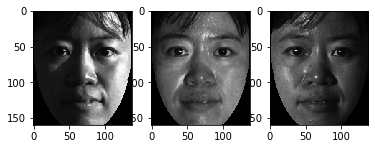

In [14]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(face1[:,0].reshape(138,160).T,cmap='gray')
ax[1].imshow(face1[:,5].reshape(138,160).T,cmap='gray')
ax[2].imshow(face1[:,20].reshape(138,160).T,cmap='gray')

#### showing some sample images from face1 data

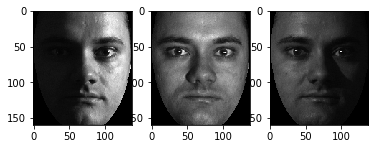

In [15]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(face2[:,0].reshape(138,160).T,cmap='gray')
ax[1].imshow(face2[:,5].reshape(138,160).T,cmap='gray')
ax[2].imshow(face2[:,20].reshape(138,160).T,cmap='gray')

#### Find orthnormal matrices from face1 and face2 martices

In [16]:
Qx=spy.linalg.orth(face1)

In [17]:
Qy=spy.linalg.orth(face2)

In [18]:
Qx.shape

(22080, 21)

In [19]:
face1.shape,Qx.shape

((22080, 21), (22080, 21))

In [20]:
face2.shape,Qy.shape

((22080, 21), (22080, 21))

#### Verify $Q_x^TQ_x=Q_y^TQ_Y=I$

In [21]:
Ix=np.around(np.matmul(Qx.T,Qx))

In [22]:
Ix.shape

(21, 21)

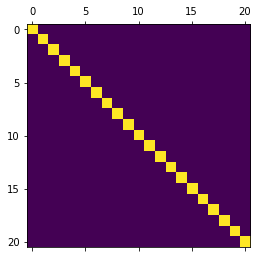

In [23]:
plt.matshow(Ix)

In [24]:
Iy=np.around(np.matmul(Qy.T,Qy))

In [25]:
Iy.shape

(21, 21)

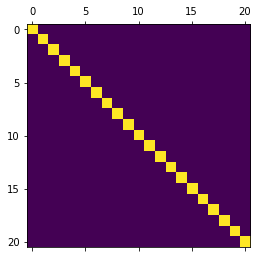

In [26]:
plt.matshow(Iy)

#### run SVD on $Q_x^TQ_y$

In [27]:
H,S,Zt=np.linalg.svd(np.matmul(Qx.T,Qy))

In [28]:
H.shape,S.shape,Zt.shape

((21, 21), (21,), (21, 21))

In [29]:
np.linalg.matrix_rank(Qx)

21

In [30]:
np.linalg.matrix_rank(Qy)

21

#### Calculate Y to determine principal angle from $Sin$

In [47]:
if np.linalg.matrix_rank(Qx)>=np.linalg.matrix_rank(Qy):
    Y=Qy - np.matmul(Qx,np.matmul(Qx.T,Qy))
else:
    Y=Qx - np.matmul(Qy,np.matmul(Qy.T,Qx))

In [48]:
Y.shape

(22080, 21)

#### Run SVD on Y to compute $sin$ values of principal angles

In [49]:
Ssine=np.linalg.svd(Y,compute_uv=False)

#### flip the array to match with corresponding $cos$ values

In [56]:
Ssine_flip=np.flip(Ssine)

#### Compute the principal angles.For very small values of principal angles use $sin$

In [76]:
principal_angles_deg=[]
principal_angles_rad=[]
for i in range(len(S)):
    if S[i]**2<0.5:
        theta_rad=math.acos(S[i])
        theta=math.degrees(math.acos(S[i]))
    elif Ssine_flip[i]**2<=0.5:
        theta_rad=math.asin(Ssine_flip[i])
        theta=math.degrees(math.asin(Ssine_flip[i]))
    principal_angles_deg.append(theta)
    principal_angles_rad.append(theta_rad)

#### Print the principal angles in degrees and radians

In [77]:
print("Principal Angles between Face1 and Face 2")
pd.DataFrame({'Principal Angles (in Degrees)': principal_angles_deg, 'Principal Angles (in Radians)': principal_angles_rad})

Principal Angles between Face1 and Face 2


,Principal Angles (in Degrees),Principal Angles (in Radians)
0,17.339911,0.302639
1,26.865253,0.468887
2,41.931173,0.731837
3,57.759428,1.008092
4,63.938597,1.115939
5,68.908976,1.202689
6,70.336297,1.227600
7,73.998328,1.291514
8,78.548064,1.370922
9,79.414259,1.386040
